# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [175]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [176]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [177]:
#  1. Get the total rides for each city type

# Create data frames for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Get the ride count for each city type
urban_ride_count = urban_cities_df.groupby(["type"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["type"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["type"]).count()["ride_id"]

print(urban_ride_count)
print(suburban_ride_count)
print(rural_ride_count)

type
Urban    1625
Name: ride_id, dtype: int64
type
Suburban    625
Name: ride_id, dtype: int64
type
Rural    125
Name: ride_id, dtype: int64


In [178]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
urban_driver_count = driver_count[2]
suburban_driver_count = driver_count[1]
rural_driver_count = driver_count[0]

print(urban_driver_count)
print(suburban_driver_count)
print(rural_driver_count)

2405
490
78


In [179]:
#  3. Get the total amount of fares for each city type
urban_fare_amount = urban_cities_df.groupby(["type"]).sum()["fare"]
suburban_fare_amount = suburban_cities_df.groupby(["type"]).sum()["fare"]
rural_fare_amount = rural_cities_df.groupby(["type"]).sum()["fare"]

print(urban_fare_amount)
print(suburban_fare_amount)
print(rural_fare_amount)

type
Urban    39854.38
Name: fare, dtype: float64
type
Suburban    19356.33
Name: fare, dtype: float64
type
Rural    4327.93
Name: fare, dtype: float64


In [180]:
#  4. Get the average fare per ride for each city type. 
urban_fare_avg = urban_cities_df.groupby(["type"]).mean()["fare"]
suburban_fare_avg = suburban_cities_df.groupby(["type"]).mean()["fare"]
rural_fare_avg = rural_cities_df.groupby(["type"]).mean()["fare"]

print(urban_fare_avg)
print(suburban_fare_avg)
print(rural_fare_avg)

type
Urban    24.525772
Name: fare, dtype: float64
type
Suburban    30.970128
Name: fare, dtype: float64
type
Rural    34.62344
Name: fare, dtype: float64


In [181]:
# 5. Get the average fare per driver for each city type. 
urban_fare_per_driver = urban_fare_amount / urban_driver_count
suburban_fare_per_driver = suburban_fare_amount / suburban_driver_count
rural_fare_per_driver = rural_fare_amount / rural_driver_count

print(urban_fare_per_driver)
print(suburban_fare_per_driver)
print(rural_fare_per_driver)

type
Urban    16.571468
Name: fare, dtype: float64
type
Suburban    39.502714
Name: fare, dtype: float64
type
Rural    55.486282
Name: fare, dtype: float64


In [182]:
#  6. Create a PyBer summary DataFrame. 

# Create list of data points
city_type = ['Rural','Suburban','Urban']
total_rides = [rural_ride_count[0], suburban_ride_count[0], urban_ride_count[0]]
total_drivers = [rural_driver_count, suburban_driver_count, urban_driver_count]
total_fares = [rural_fare_amount[0], suburban_fare_amount[0], urban_fare_amount[0]]
avg_fare_per_ride = [float(rural_fare_avg[0]), float(suburban_fare_avg[0]), float(urban_fare_avg[0])]
avg_fare_per_driver = [float(rural_fare_per_driver[0]), float(suburban_fare_per_driver[0]), float(urban_fare_per_driver[0])]

# Create a DataFrame
pyber_summary_df = pd.DataFrame(
          {"Total Rides": total_rides, 
          "Total Drivers": total_drivers,
          "Total Fares": total_fares, 
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver},index=city_type)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [183]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [184]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [185]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [186]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date_city_df.groupby(["type","date"]).sum()["fare"]

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [187]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date_city_df = fares_by_date_city_df.reset_index()

ValueError: cannot insert level_0, already exists

In [188]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_date_pivot_df = fares_by_date_city_df.pivot(index='date', columns='type', values='fare')

fares_by_date_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [189]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_by_date_pivot_df.loc['2019-01-01':'2019-04-29']

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [190]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fares_by_date_pivot_df.index = pd.to_datetime(fares_by_date_pivot_df.index)

fares_by_date_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [191]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_date_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [192]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_date_pivot_df = fares_by_date_pivot_df.resample('W').sum()

fares_by_date_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


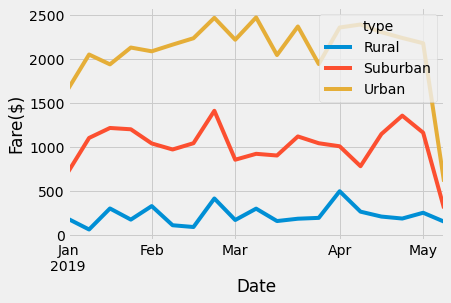

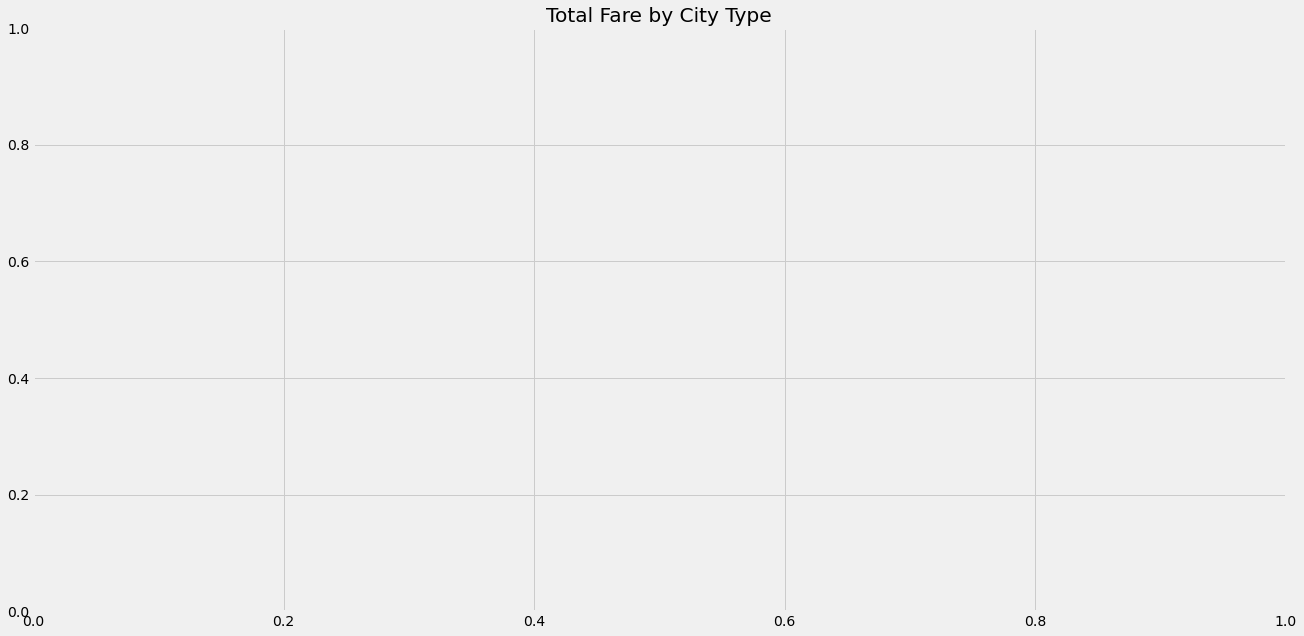

In [200]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fares_by_date_pivot_df.plot()
# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Fare($)")
plt.figure(figsize=(20,10))
# Create a title.
plt.title("Total Fare by City Type")
plt.show()